In [1]:
# importing useful libraries for the complete python file

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
# read the dataset
housing_dataframe = pd.read_csv(r'Housing.csv')
housing_dataframe.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


######  Problem Statement: 
- The price is the target variable and rest others are the predictor variables.
- We need to predict the price when given other potential related variables.
- We need to build an multiple linear regression model thinking that the underlying distribution of the data is linear.

In [3]:
# analyzing the shape of the dataframe
housing_dataframe.shape

(545, 13)

In [4]:
# analyzing the info of the dataframe
housing_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [5]:
# analyzing the describe of the dataframe
housing_dataframe.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [6]:
# analyzing the columns in the dataframe
housing_dataframe.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [7]:
categorical_variabls_list = ['mainroad','guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
numerical_variables_list = ['area', 'bedrooms', 'bathrooms', 'stories']

##### Viuslizing the data
- Through visualizations we will get to know which columns have some relation with price

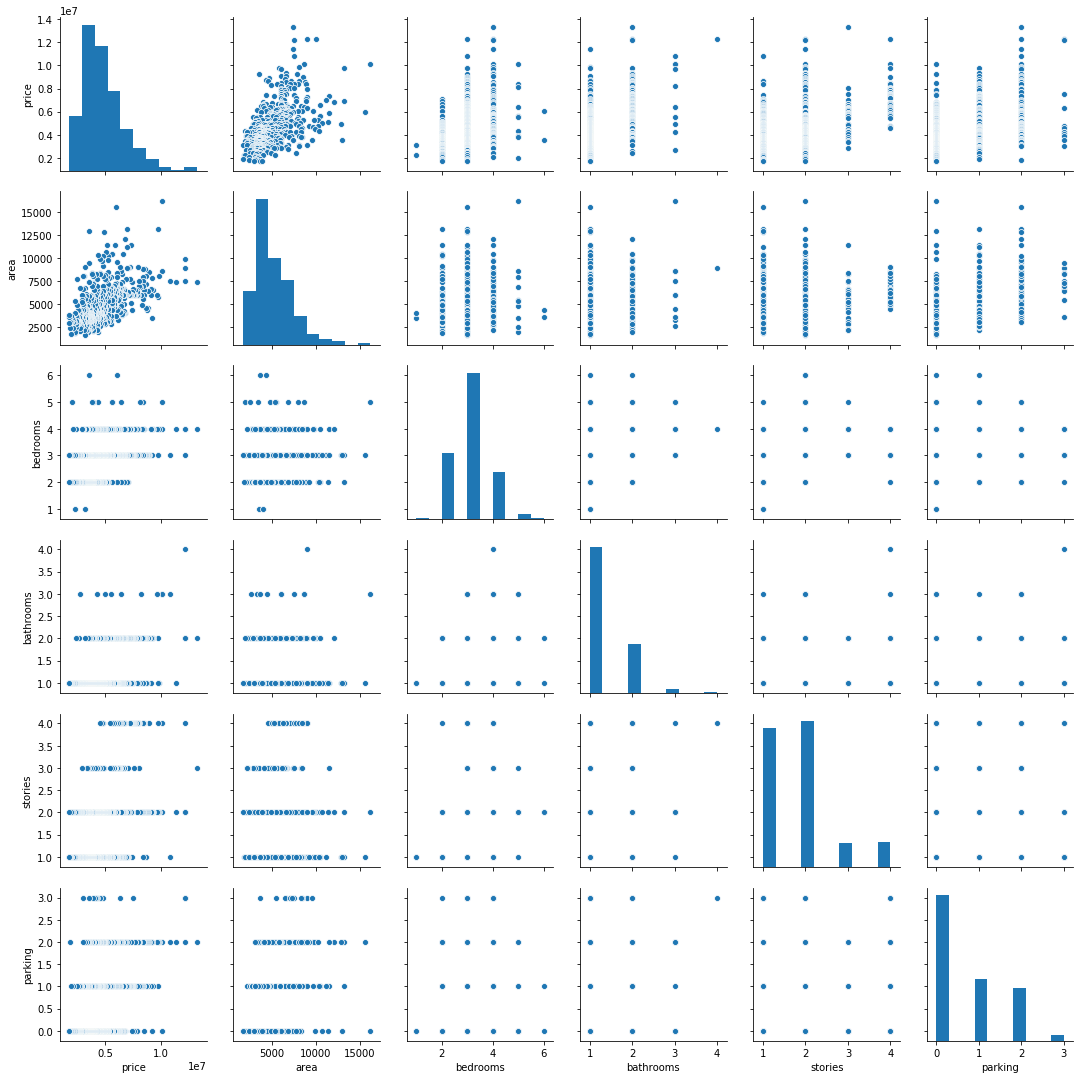

In [8]:
# lets visualize the data to check linearity existing pairs and to check multicolinearity
sns.pairplot(housing_dataframe)

from the above pairplot we can see that there exists some correlation between the price and area. Also there is slight correlation between price and bedrooms etc.

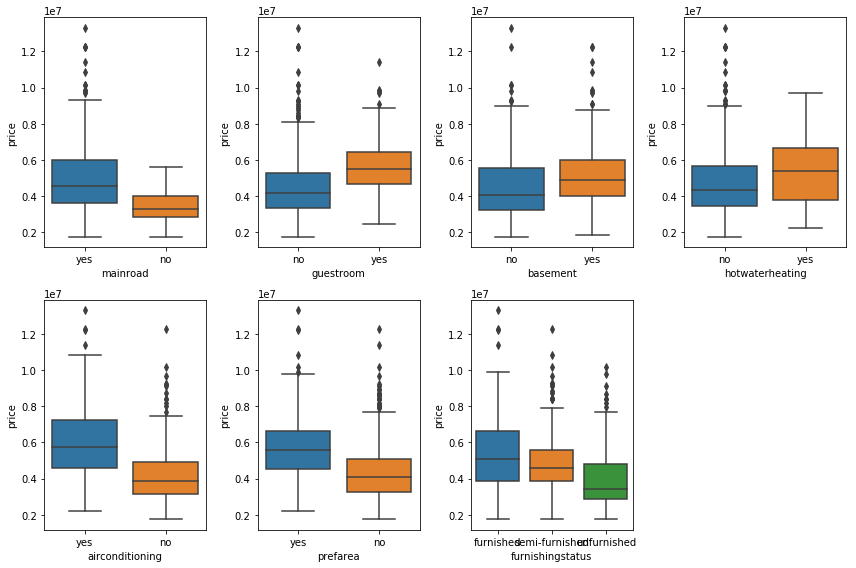

In [9]:
# visual the relations between the catgeorical variables and the target variable price
plt.figure(figsize = (12,8))
for index, variable in enumerate(categorical_variabls_list):
    plt.subplot(2,4,index+1)
    sns.boxplot(data = housing_dataframe, x = housing_dataframe[variable], y = housing_dataframe['price'])
    plt.tight_layout()
plt.show()

From the above plots we can see that except Basement rest all other categorical variables have some significant relation with price.

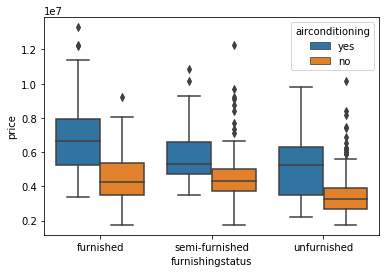

In [10]:
# visualizing using some combinations
sns.boxplot(data = housing_dataframe, x = housing_dataframe['furnishingstatus'], y = housing_dataframe['price'], hue = housing_dataframe['airconditioning'])

From the above plot we can infer that air conditioning parameter increases the price in differnet status of furnishing.

#### Data preparation
- converting 'yes' and 'no' response into encoding format meaning into 1's and 0's.
- where 1 refers to 'yes' and 0 refers to 'no'
- Also converting other categorical variables into dummy encoding using dummy variables.

In [11]:
# Converting 'yes' and 'no' into 1's and 0's.
housing_dataframe[categorical_variabls_list].head()

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
0,yes,no,no,no,yes,yes,furnished
1,yes,no,no,no,yes,no,furnished
2,yes,no,yes,no,no,yes,semi-furnished
3,yes,no,yes,no,yes,yes,furnished
4,yes,yes,yes,no,yes,no,furnished


In [12]:
categorical_response_variables = categorical_variabls_list[:len(categorical_variabls_list)-1]
categorical_response_variables

['mainroad',
 'guestroom',
 'basement',
 'hotwaterheating',
 'airconditioning',
 'prefarea']

In [13]:
# converting the responses in the columns of the dataframe
for i in categorical_response_variables:
    housing_dataframe.loc[housing_dataframe[i] == 'yes', i] = 1
    housing_dataframe.loc[housing_dataframe[i] == 'no', i] = 0

In [14]:
# checking the dataframe after converting the responses
housing_dataframe[categorical_variabls_list].head()

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
0,1,0,0,0,1,1,furnished
1,1,0,0,0,1,0,furnished
2,1,0,1,0,0,1,semi-furnished
3,1,0,1,0,1,1,furnished
4,1,1,1,0,1,0,furnished


In [15]:
# converting the furnishingstatus into dummy encoding
dummy_dataframe = pd.get_dummies(housing_dataframe['furnishingstatus'])
dummy_dataframe.head()

,furnished,semi-furnished,unfurnished
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0


In [16]:
# concating the dummy_dataframe with housing_dataframe
housing_dataframe = pd.concat([housing_dataframe, dummy_dataframe], axis = 1)
housing_dataframe.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,furnished,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,1,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,0,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,1,0,0


In [17]:
# removing furnishingstatus and unfurnished column
housing_dataframe.drop('furnishingstatus', axis = 1, inplace = True)
housing_dataframe.drop('unfurnished', axis = 1, inplace = True)

In [18]:
housing_dataframe.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1,0


#### Splitting the data into train and test dataframes

In [19]:
housing_train_dataframe, housing_test_dataframe = train_test_split(housing_dataframe, train_size = 0.70, test_size = 0.30, random_state = 100)

In [20]:
# checking out train dataframe
housing_train_dataframe.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished
359,3710000,3600,3,1,1,1,0,0,0,0,1,0,0,0
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,0,1
159,5460000,3150,3,2,1,1,1,1,0,1,0,0,1,0
35,8080940,7000,3,2,4,1,0,0,0,1,2,0,1,0
28,8400000,7950,5,2,2,1,0,1,1,0,2,0,0,0


In [21]:
# checking the shape of the dataframe
housing_train_dataframe.shape

(381, 14)

In [22]:
# checking the test dataframe
housing_test_dataframe.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished
265,4403000,2880,3,1,2,1,0,0,0,0,0,1,0,1
54,7350000,6000,3,2,2,1,1,0,0,1,1,0,0,1
171,5250000,10269,3,1,1,1,0,0,0,0,1,1,0,1
244,4550000,5320,3,1,2,1,1,1,0,0,0,1,0,1
268,4382000,4950,4,1,2,1,0,0,0,1,0,0,0,1


In [23]:
# checking the shape of the test data
housing_test_dataframe.shape

(164, 14)

#### scaling the train dataframe
- The sole purpose of scaling is to bring all variables in one standard range
- Also in the backend minimizes the time taken by the gradient descent optimization technique.
- Scaling of numerical variables is enough as the categorical variables have already been       encoded into 1's and 0's. Again when performed scaling for the categorical variables also     we lose the intrepetation possibility.

In [24]:
scaler_variables_list = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']

In [25]:
# creating scaler object
scaler = MinMaxScaler()

# fitting on to the scaler object
housing_train_dataframe[scaler_variables_list] = scaler.fit_transform(housing_train_dataframe[scaler_variables_list])

C:\Users\saimmidi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [26]:
housing_train_dataframe.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished
359,0.169697,0.155227,0.4,0.0,0.000000,1,0,0,0,0,0.333333,0,0,0
19,0.615152,0.403379,0.4,0.5,0.333333,1,0,0,0,1,0.333333,1,0,1
159,0.321212,0.115628,0.4,0.5,0.000000,1,1,1,0,1,0.000000,0,1,0
35,0.548133,0.454417,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0,1,0
28,0.575758,0.538015,0.8,0.5,0.333333,1,0,1,1,0,0.666667,0,0,0


In [27]:
# we can look at the describe of the dataframe to check whether scaling is done properly
housing_train_dataframe.describe()

,price,area,bedrooms,bathrooms,stories,parking,furnished,semi-furnished
count,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000
mean,0.260333,0.288710,0.386352,0.136483,0.268591,0.242345,0.259843,0.414698
std,0.157607,0.181420,0.147336,0.237325,0.295001,0.285933,0.439125,0.493318
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.151515,0.155227,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.221212,0.234424,0.400000,0.000000,0.333333,0.000000,0.000000,0.000000
75%,0.345455,0.398099,0.400000,0.500000,0.333333,0.333333,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


From the above we can see that for the scaled variables the min has become 0 and max has become 1 as we have scaled using MinMaxScaler. which scales every datapoint between 0 and 1. There is another method of scaling called Standardization which scales all the values such that the distribution of the scaled values follows standard normal distribution with mean 0 and std =1. We generally prefer MinMaxScaler as it is insiginificant to outliers and converts all the data points within the range of 0 and 1. where as the standardization has been distribution which will be affected in the presence of outliers.

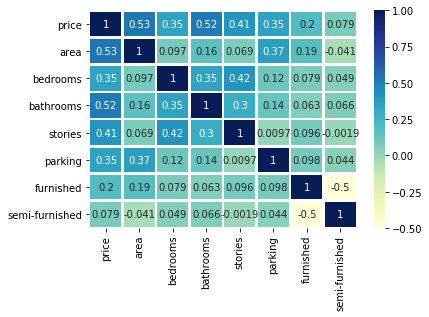

In [28]:
# lets check the correlation between the variables
# to check quantatively which variable has strong correlation with price
sns.heatmap(housing_train_dataframe.corr(), annot = True, cmap = 'YlGnBu', linewidths= 1.5, linecolor= 'white')

From the above correlation matrix we can see that area has strong correlation with price among all other variables. Next comes the bathrooms with 0.52 correlation score or pearson R value.

## Model building
- Start model building either using forward selection of the variables or backward selection.
- Mixed selection of the variables can also be used.
- Forward selection of model is also called as bottom up approach in which we start with         single variable and top of that start building with other variables as well.
- In order to start forward selection we need to select the first variable to start model       building.
- The first variable for forward selection will be the variable which has strong correlation     with the response variable.
- But forward selection is an greedy process meaning the variable when considered will be       significant but later when added with other variables it become insiginificant.
- Hence it is better to use backward selection where we start model building using all           predictor variables and cutdown the variables which are insignificant as per p value. Also   we take into consideration of VIF to check whether any of the variable is correlated with     any combination predictor variables to avoid multicolinearity affect.

- we start forward selection to know the process with area predictor variable

In [29]:
# analyzing the train dataframe
housing_train_dataframe.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished
359,0.169697,0.155227,0.4,0.0,0.000000,1,0,0,0,0,0.333333,0,0,0
19,0.615152,0.403379,0.4,0.5,0.333333,1,0,0,0,1,0.333333,1,0,1
159,0.321212,0.115628,0.4,0.5,0.000000,1,1,1,0,1,0.000000,0,1,0
35,0.548133,0.454417,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0,1,0
28,0.575758,0.538015,0.8,0.5,0.333333,1,0,1,1,0,0.666667,0,0,0


In [30]:
# create X and y variable
X_train = housing_train_dataframe.iloc[:,1:]
y_train = housing_train_dataframe['price']

In [31]:
# analyzing the X variable
X_train.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished
359,0.155227,0.4,0.0,0.000000,1,0,0,0,0,0.333333,0,0,0
19,0.403379,0.4,0.5,0.333333,1,0,0,0,1,0.333333,1,0,1
159,0.115628,0.4,0.5,0.000000,1,1,1,0,1,0.000000,0,1,0
35,0.454417,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0,1,0
28,0.538015,0.8,0.5,0.333333,1,0,1,1,0,0.666667,0,0,0


In [32]:
# checking the shape of X_train
X_train.shape

(381, 13)

In [33]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 381 entries, 359 to 520
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   area             381 non-null    float64
 1   bedrooms         381 non-null    float64
 2   bathrooms        381 non-null    float64
 3   stories          381 non-null    float64
 4   mainroad         381 non-null    object 
 5   guestroom        381 non-null    object 
 6   basement         381 non-null    object 
 7   hotwaterheating  381 non-null    object 
 8   airconditioning  381 non-null    object 
 9   parking          381 non-null    float64
 10  prefarea         381 non-null    object 
 11  furnished        381 non-null    uint8  
 12  semi-furnished   381 non-null    uint8  
dtypes: float64(5), object(6), uint8(2)
memory usage: 36.5+ KB


In [34]:
object_list = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
for i in object_list:
    X_train[i] = X_train[i].astype(int)

In [35]:
# checking the info after changing the data types
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 381 entries, 359 to 520
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   area             381 non-null    float64
 1   bedrooms         381 non-null    float64
 2   bathrooms        381 non-null    float64
 3   stories          381 non-null    float64
 4   mainroad         381 non-null    int32  
 5   guestroom        381 non-null    int32  
 6   basement         381 non-null    int32  
 7   hotwaterheating  381 non-null    int32  
 8   airconditioning  381 non-null    int32  
 9   parking          381 non-null    float64
 10  prefarea         381 non-null    int32  
 11  furnished        381 non-null    uint8  
 12  semi-furnished   381 non-null    uint8  
dtypes: float64(5), int32(6), uint8(2)
memory usage: 27.5 KB


In [36]:
# analyzing the y_train variable
y_train.head()

359    0.169697
19     0.615152
159    0.321212
35     0.548133
28     0.575758
Name: price, dtype: float64

In [37]:
# building the model

# adding constant to X_train
X_train_sm = sm.add_constant(X_train['area'])

# creating the model using statsmodels OLS technique
mlr_model = sm.OLS(y_train, X_train_sm)

# fitting the model on to the model object
mlr_model = mlr_model.fit()

# checking the parameters of the model
mlr_model.params

const    0.126894
area     0.462192
dtype: float64

In [38]:
# checking the statistica summary of the model
mlr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     149.6
Date:                Sat, 11 Apr 2020   Prob (F-statistic):           3.15e-29
Time:                        23:14:34   Log-Likelihood:                 227.23
No. Observations:                 381   AIC:                            -450.5
Df Residuals:                     379   BIC:                            -442.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1269      0.013      9.853      0.000       0.102       0.152
area           0.4622      0.038     12.232      0.000       0.388       0.536
==============================================================================
Omnibus:                       67.313   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              143.063
Skew:                           0.925   Prob(JB):                     8.59e-32
Kurtosis:                       5.365   Cond. No.                         5.99
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- From the above summary statistics we can see the following obervations:
- coefficient is significant as p value is low.
- R square value is 0.28, which means about only 28% of the variation in price is being explained by Area.
- F statistics value is significantly high when compared to 1 and also the p value of F-statistic is close to 0 therefore the overall model is significant.

In [39]:
# analyzing the X_train
X_train.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished
359,0.155227,0.4,0.0,0.000000,1,0,0,0,0,0.333333,0,0,0
19,0.403379,0.4,0.5,0.333333,1,0,0,0,1,0.333333,1,0,1
159,0.115628,0.4,0.5,0.000000,1,1,1,0,1,0.000000,0,1,0
35,0.454417,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0,1,0
28,0.538015,0.8,0.5,0.333333,1,0,1,1,0,0.666667,0,0,0


In [40]:
# lets add another predictor variable and see whether the R square value increases by how much.

# add constant
X_train_sm = sm.add_constant(X_train[['area', 'bathrooms']])

# creating model object
mlr_model = sm.OLS(y_train, X_train_sm)

# fitting the model
mlr_model = mlr_model.fit()

# checking the parameters of the model
mlr_model.params

const        0.104589
area         0.398396
bathrooms    0.298374
dtype: float64

In [41]:
# checking the summary statistics of the model
mlr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.477
Method:                 Least Squares   F-statistic:                     174.1
Date:                Sat, 11 Apr 2020   Prob (F-statistic):           2.51e-54
Time:                        23:14:34   Log-Likelihood:                 288.24
No. Observations:                 381   AIC:                            -570.5
Df Residuals:                     378   BIC:                            -558.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1046      0.011      9.384      0.000       0.083       0.127
area           0.3984      0.033     12.192      0.000       0.334       0.463
bathrooms      0.2984      0.025     11.945      0.000       0.249       0.347
==============================================================================
Omnibus:                       62.839   Durbin-Watson:                   2.157
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              168.790
Skew:                           0.784   Prob(JB):                     2.23e-37
Kurtosis:                       5.859   Cond. No.                         6.17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- From the above model summary statistics we can infer few observations:
- The R square value has been significantly increased.
- The p value of the predictor coefficients is low hence the coefficients are insignificant.
- The F-statistics and p value of the F-statistics are considerably high and low hence the overall model is significant.

In [42]:
# lets add another variable and proceed further in forward selection

# add constant
X_train_sm = sm.add_constant(X_train[['area', 'bathrooms', 'stories']])

# creating model object
mlr_model = sm.OLS(y_train, X_train_sm)

# fitting the model
mlr_model = mlr_model.fit()

# checking the parameters of the model
mlr_model.params

const        0.074627
area         0.393377
bathrooms    0.246289
stories      0.143415
dtype: float64

In [43]:
# checking summary statistics of the model
mlr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.545
Model:                            OLS   Adj. R-squared:                  0.542
Method:                 Least Squares   F-statistic:                     150.7
Date:                Sat, 11 Apr 2020   Prob (F-statistic):           3.56e-64
Time:                        23:14:34   Log-Likelihood:                 313.95
No. Observations:                 381   AIC:                            -619.9
Df Residuals:                     377   BIC:                            -604.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0746      0.011      6.667      0.000       0.053       0.097
area           0.3934      0.031     12.859      0.000       0.333       0.454
bathrooms      0.2463      0.024     10.085      0.000       0.198       0.294
stories        0.1434      0.019      7.382      0.000       0.105       0.182
==============================================================================
Omnibus:                       75.584   Durbin-Watson:                   2.119
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              229.577
Skew:                           0.897   Prob(JB):                     1.41e-50
Kurtosis:                       6.353   Cond. No.                         6.41
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- The R square value again has been increased insignificantly.
- The p value of the coefficients is low hence the coefficients are significant.
- The F value has been descreased when compared to previous statistics but the value is far higher than 1 hence the overall model is again insignificant.

- This kind of approach in model building is little tedious hence we consider all the predictor variables and step down in steps on comparing VIF and the p values associated with the coefficients.

### Adding all variables in creating model

In [44]:
# analyzing the X_train
X_train.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished
359,0.155227,0.4,0.0,0.000000,1,0,0,0,0,0.333333,0,0,0
19,0.403379,0.4,0.5,0.333333,1,0,0,0,1,0.333333,1,0,1
159,0.115628,0.4,0.5,0.000000,1,1,1,0,1,0.000000,0,1,0
35,0.454417,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0,1,0
28,0.538015,0.8,0.5,0.333333,1,0,1,1,0,0.666667,0,0,0


In [45]:
# adding constant to X_train
X_train_lm  = sm.add_constant(X_train)

In [46]:
# analyzing X_train_sm
X_train_lm.head()

,const,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished
359,1.0,0.155227,0.4,0.0,0.000000,1,0,0,0,0,0.333333,0,0,0
19,1.0,0.403379,0.4,0.5,0.333333,1,0,0,0,1,0.333333,1,0,1
159,1.0,0.115628,0.4,0.5,0.000000,1,1,1,0,1,0.000000,0,1,0
35,1.0,0.454417,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0,1,0
28,1.0,0.538015,0.8,0.5,0.333333,1,0,1,1,0,0.666667,0,0,0


In [47]:
# creating model
mlr_model_1 = sm.OLS(y_train, X_train_lm).fit()

# checing paramters of the model
mlr_model_1.params

const             -0.010973
area               0.234664
bedrooms           0.046735
bathrooms          0.190823
stories            0.108516
mainroad           0.050441
guestroom          0.030428
basement           0.021595
hotwaterheating    0.084863
airconditioning    0.066881
parking            0.060735
prefarea           0.059428
furnished          0.031006
semi-furnished     0.031926
dtype: float64

In [48]:
# Checking the summary statistics of the model
mlr_model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     60.40
Date:                Sat, 11 Apr 2020   Prob (F-statistic):           8.83e-83
Time:                        23:14:34   Log-Likelihood:                 381.79
No. Observations:                 381   AIC:                            -735.6
Df Residuals:                     367   BIC:                            -680.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0110      0.018     -0.602      0.548      -0.047       0.025
area                0.2347      0.030      7.795      0.000       0.175       0.294
bedrooms            0.0467      0.037      1.267      0.206      -0.026       0.119
bathrooms           0.1908      0.022      8.679      0.000       0.148       0.234
stories             0.1085      0.019      5.661      0.000       0.071       0.146
mainroad            0.0504      0.014      3.520      0.000       0.022       0.079
guestroom           0.0304      0.014      2.233      0.026       0.004       0.057
basement            0.0216      0.011      1.943      0.053      -0.000       0.043
hotwaterheating     0.0849      0.022      3.934      0.000       0.042       0.127
airconditioning     0.0669      0.011      5.899      0.000       0.045       0.089
parking             0.0607      0.018      3.365      0.001       0.025       0.096
prefarea            0.0594      0.012      5.040      0.000       0.036       0.083
furnished           0.0310      0.013      2.440      0.015       0.006       0.056
semi-furnished      0.0319      0.011      2.884      0.004       0.010       0.054
==============================================================================
Omnibus:                       93.687   Durbin-Watson:                   2.093
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              304.917
Skew:                           1.091   Prob(JB):                     6.14e-67
Kurtosis:                       6.801   Cond. No.                         14.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- from the above summary statistics we can see that there are some p values of the coefficients considerably higher than 0.05 making them insignificant.
- considering only p value in reduction of the variables is not an advisible technique.
- It is better to take into consideration of VIF to make judgements about the variable.

- High VIF and high p value = remove the varibles
- Low VIF and low p value =  take into consideration
- Low VIF and high p value = remove them as there might be chance that after removing such variables the variales with high VIF and low p value their VIF value might become low. Hence it is recommened to remove first Low VIF anf high p value
- High VIF and low p value = check after removal of above variables is there is any change in VIF and accordingly take action.

In [49]:
# calculating VIF

# create a dataframe VIF
vif = pd.DataFrame()

# add all columns of the X_train as on column
vif['feature'] = X_train.columns

# add VIF score for each preditor considered as target variable
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]

vif.sort_values(by = 'VIF', ascending = False, inplace = True)

vif

,feature,VIF
1,bedrooms,6.687013
4,mainroad,5.906699
0,area,4.734174
3,stories,2.685813
12,semi-furnished,2.246174
9,parking,2.115992
6,basement,2.018064
11,furnished,1.925198
8,airconditioning,1.786179
2,bathrooms,1.654951


- Generally the vif value greater than 5 is considered as high value meaning for an predictor variable if the VIF turns out to be greater than 5 then it indicates that particular predictor variables is strongly correlated with the combination of other variables. Hence it is better to remove such values.

- For values in between 5 and 10 is considered to worth inspecting meaning the particular p value of the predictor variable needed to also checked.

- For values less than 5 it is considered to be better values meaning it indicates that the predictor variable has no much correlation between other predictor variables.

In [50]:
# first remove the predictor variables with high vif and high p value

# bedrooms has high p value and high vif value
X_train.drop('bedrooms', inplace =  True, axis =1)

# create constant to the X_train
X_train_sm = sm.add_constant(X_train)

# creating model object
mlr_model_2 = sm.OLS(y_train, X_train_sm)

# fitting the model
mlr_model_2 = mlr_model_2.fit()

# checking params of the model
mlr_model_2.params

const              0.003310
area               0.234970
bathrooms          0.196437
stories            0.117790
mainroad           0.048832
guestroom          0.030081
basement           0.023910
hotwaterheating    0.086381
airconditioning    0.066599
parking            0.062851
prefarea           0.059651
furnished          0.031810
semi-furnished     0.032603
dtype: float64

In [51]:
# checking summary statistics of the model
mlr_model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     65.20
Date:                Sat, 11 Apr 2020   Prob (F-statistic):           2.35e-83
Time:                        23:14:34   Log-Likelihood:                 380.96
No. Observations:                 381   AIC:                            -735.9
Df Residuals:                     368   BIC:                            -684.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0033      0.014      0.231      0.818      -0.025       0.032
area                0.2350      0.030      7.799      0.000       0.176       0.294
bathrooms           0.1964      0.022      9.114      0.000       0.154       0.239
stories             0.1178      0.018      6.643      0.000       0.083       0.153
mainroad            0.0488      0.014      3.419      0.001       0.021       0.077
guestroom           0.0301      0.014      2.207      0.028       0.003       0.057
basement            0.0239      0.011      2.179      0.030       0.002       0.045
hotwaterheating     0.0864      0.022      4.007      0.000       0.044       0.129
airconditioning     0.0666      0.011      5.870      0.000       0.044       0.089
parking             0.0629      0.018      3.495      0.001       0.027       0.098
prefarea            0.0597      0.012      5.055      0.000       0.036       0.083
furnished           0.0318      0.013      2.504      0.013       0.007       0.057
semi-furnished      0.0326      0.011      2.946      0.003       0.011       0.054
==============================================================================
Omnibus:                       97.809   Durbin-Watson:                   2.097
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              326.485
Skew:                           1.131   Prob(JB):                     1.27e-71
Kurtosis:                       6.930   Cond. No.                         11.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
# checking the vif values after removal of bedrooms

vif = pd.DataFrame()

# add all columns of the X_train as on column
vif['feature'] = X_train.columns

# add VIF score for each preditor considered as target variable
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]

vif.sort_values(by = 'VIF', ascending = False, inplace = True)

vif

,feature,VIF
3,mainroad,5.165755
0,area,4.618933
2,stories,2.245348
11,semi-furnished,2.114170
8,parking,2.106558
5,basement,1.902139
10,furnished,1.878173
7,airconditioning,1.786112
1,bathrooms,1.613436
9,prefarea,1.499478


In [53]:
# removing basement for the X_train
X_train.drop('basement', axis= 1, inplace = True)

# create constant to the X_train
X_train_sm = sm.add_constant(X_train)

# creating model object
mlr_model_3 = sm.OLS(y_train, X_train_sm)

# fitting the model
mlr_model_3 = mlr_model_3.fit()

# checking params of the model
mlr_model_3.params

const              0.008964
area               0.233816
bathrooms          0.201797
stories            0.108195
mainroad           0.049717
guestroom          0.040172
hotwaterheating    0.087588
airconditioning    0.068309
parking            0.062826
prefarea           0.063754
furnished          0.033023
semi-furnished     0.034079
dtype: float64

In [54]:
# checking the summary statistcs
mlr_model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     69.98
Date:                Sat, 11 Apr 2020   Prob (F-statistic):           2.82e-83
Time:                        23:14:34   Log-Likelihood:                 378.52
No. Observations:                 381   AIC:                            -733.0
Df Residuals:                     369   BIC:                            -685.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0090      0.014      0.632      0.528      -0.019       0.037
area                0.2338      0.030      7.723      0.000       0.174       0.293
bathrooms           0.2018      0.022      9.377      0.000       0.159       0.244
stories             0.1082      0.017      6.268      0.000       0.074       0.142
mainroad            0.0497      0.014      3.464      0.001       0.021       0.078
guestroom           0.0402      0.013      3.117      0.002       0.015       0.066
hotwaterheating     0.0876      0.022      4.044      0.000       0.045       0.130
airconditioning     0.0683      0.011      6.005      0.000       0.046       0.091
parking             0.0628      0.018      3.476      0.001       0.027       0.098
prefarea            0.0638      0.012      5.445      0.000       0.041       0.087
furnished           0.0330      0.013      2.589      0.010       0.008       0.058
semi-furnished      0.0341      0.011      3.070      0.002       0.012       0.056
==============================================================================
Omnibus:                       97.249   Durbin-Watson:                   2.099
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              323.445
Skew:                           1.126   Prob(JB):                     5.82e-71
Kurtosis:                       6.912   Cond. No.                         10.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
# checking vif values

# creating vif dataframe
vif = pd.DataFrame()

# adding columns into vif
vif['features'] = X_train.columns

# adding vif column into dataframe
vif['VIF_score'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]

#sorting the vif dataframe
vif.sort_values(by = 'VIF_score', ascending = False, inplace =True)

#reading the vif dataframe
vif

,features,VIF_score
3,mainroad,5.007672
0,area,4.615657
2,stories,2.133506
7,parking,2.106546
10,semi-furnished,2.079454
9,furnished,1.865995
6,airconditioning,1.775587
1,bathrooms,1.591858
8,prefarea,1.467015
4,guestroom,1.301803


Now all the variables have less vif and less p values hence the model has been built using potential variables. Let's check resiudal analysis and evalvation of the model on the test data.

#### Residual analysis
- to check whether the error variables are normally distributed across mean 0.

In [56]:
# calculation of residuals

# computing predicted values
y_train_pred = mlr_model_3.predict(X_train_sm)

# calculating residuals
res = y_train - y_train_pred

# reading res
res.head()

359    0.053779
19     0.138106
159   -0.006908
35     0.030893
28     0.124845
dtype: float64

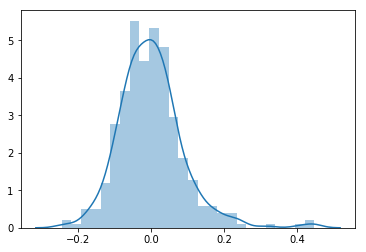

In [57]:
# plotting histogram of res
sns.distplot(res)

From the above distribution upon observation we can see that the erros terms are normally distributed across mean 0.

In [58]:
# reading housing_test_dataframe
housing_test_dataframe.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished
265,4403000,2880,3,1,2,1,0,0,0,0,0,1,0,1
54,7350000,6000,3,2,2,1,1,0,0,1,1,0,0,1
171,5250000,10269,3,1,1,1,0,0,0,0,1,1,0,1
244,4550000,5320,3,1,2,1,1,1,0,0,0,1,0,1
268,4382000,4950,4,1,2,1,0,0,0,1,0,0,0,1


In [59]:
scaler_variables_list

['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']

In [60]:
# evalvating the model

# applying scaling on the housing_test_dataframe:

# transforming the datapoints of the test data
housing_test_dataframe[scaler_variables_list] = scaler.transform(housing_test_dataframe[scaler_variables_list])

# defining X_test and y_test
X_test = housing_test_dataframe.iloc[:,1:]
y_test = housing_test_dataframe['price']

#dropping variables which are not in model from X_test
X_test.drop(['bedrooms','basement'], axis = 1, inplace = True)

# creating constant for X_test
X_test_sm = sm.add_constant(X_test)

# predicting y_test_pred using the model
y_test_pred = mlr_model_3.predict(X_test_sm)

# computing r2_score of the test model
r2_value_test = r2_score(y_test, y_test_pred)

# computing r2_score of train model
r2_value_train = r2_score(y_train, y_train_pred)

# printing r2_score of the test and train for comparison
print(r2_value_test)
print(r2_value_train)

0.6599768950480321
0.6759700083084808


From the above values we can say that R-squared values of both test and train data are very close. Hence the model performed well on the test dataset as well. Hence the model is significant.

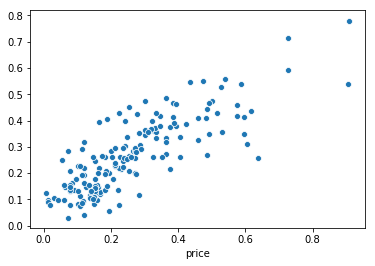

In [61]:
# plotting scatter plot between y_test and y_test_pred
sns.scatterplot(y_test, y_test_pred)

from the above scattter plot we can see that there is no much error between the y_test and y_test_pred in the lower segment of the data although there exists some error difference between higher points. But however the model fitted in an optimal manner.

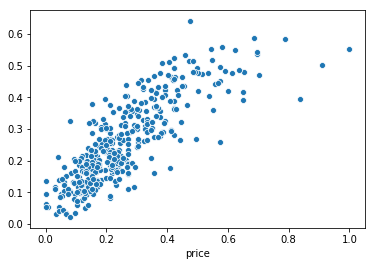

In [62]:
# plotting between y_train and y_train_pred
sns.scatterplot(y_train, y_train_pred)

From the above plot we can see that the model has fitted in its best optimal manner in order to reduce least square errors.

In [63]:
# checking the summary statistics of the train model
mlr_model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     69.98
Date:                Sat, 11 Apr 2020   Prob (F-statistic):           2.82e-83
Time:                        23:21:26   Log-Likelihood:                 378.52
No. Observations:                 381   AIC:                            -733.0
Df Residuals:                     369   BIC:                            -685.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0090      0.014      0.632      0.528      -0.019       0.037
area                0.2338      0.030      7.723      0.000       0.174       0.293
bathrooms           0.2018      0.022      9.377      0.000       0.159       0.244
stories             0.1082      0.017      6.268      0.000       0.074       0.142
mainroad            0.0497      0.014      3.464      0.001       0.021       0.078
guestroom           0.0402      0.013      3.117      0.002       0.015       0.066
hotwaterheating     0.0876      0.022      4.044      0.000       0.045       0.130
airconditioning     0.0683      0.011      6.005      0.000       0.046       0.091
parking             0.0628      0.018      3.476      0.001       0.027       0.098
prefarea            0.0638      0.012      5.445      0.000       0.041       0.087
furnished           0.0330      0.013      2.589      0.010       0.008       0.058
semi-furnished      0.0341      0.011      3.070      0.002       0.012       0.056
==============================================================================
Omnibus:                       97.249   Durbin-Watson:                   2.099
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              323.445
Skew:                           1.126   Prob(JB):                     5.82e-71
Kurtosis:                       6.912   Cond. No.                         10.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

model_equation = 0.0090+0.2338*X_train_sm['area']+ 0.2018*X_train_sm['bathrooms']+ 0.1082*X_train_sm['stories']+ 0.0497*X_train_sm['mainroad']+ 0.0402*X_train_sm['guestroom']+ 0.0876*X_train_sm['hotwaterheating']+ 0.0683*X_train_sm['airconditioning']+ 0.0628*X_train_sm['parking']+ 0.0638*X_train_sm['prefarea']+ 0.0330*X_train_sm['furnished']+ 0.0341*X_train_sm['semi-furnished']